<a href="https://colab.research.google.com/github/jim-min/gdsc-ai-study/blob/main/Week01/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GDG 인공지능 기초 1주차 과제**

## **<span style="color:green"> [ 실습 ] </span> KNN**
수업 때 했던 KNN 내용을 떠올리며 실습을 진행해봅시다!

**<span style="color:red"> 1. </span>** 우선 실습에 필요한 모듈을 다운 받고, 기본적인 설정을 해줍니다다.

In [ ]:
!pip install torch torchvision
!pip install numpy

In [4]:
import random
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

**<span style="color:red"> 2. </span>** 실습에 사용할 데이터 셋을 받아옵니다.  
    우리가 사용할 데이터는 cifar-10이라는 총 10 종류의 다양한 이미지들이 있는 데이터 입니다.

In [14]:
# CIFAR-10 데이터셋 로드
train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True)
test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True)

X_train = np.array(train_dataset.data)
y_train = np.array(train_dataset.targets)
X_test = np.array(test_dataset.data)
y_test = np.array(test_dataset.targets)

# 데이터의 크기 확인
print(f"Train X shape: {X_train.shape}, Train Y shape: {y_train.shape}")
print(f"Test X shape: {X_test.shape}, Test Y shape: {y_test.shape}")

Train X shape: (50000, 32, 32, 3), Train Y shape: (50000,)
Test X shape: (10000, 32, 32, 3), Test Y shape: (10000,)


우리가 받아온 데이터가 어떤 데이터인지 알아보기 위해 각 class별로 7개의 이미지를 시각화 해봅시다.

TypeError: Invalid shape (3072,) for image data

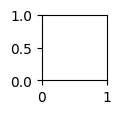

In [13]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 8
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

50000개 + 10000개 = 60000개의 데이터를 다루기엔 너무 시간이 많이 필요하니, 적당히 데이터의 크기를 조절해 줍니다.

In [15]:
num_training = 5000
mask = list(range(0, num_training * 2, 2)) # 예측 다르게 하기 위해서 마스크 값 바꿔봄
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

**<span style="color:red"> 3. </span>** KNN 분류기를 만들고, 데이터를 넣어줍니다.

In [16]:
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass

    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1):
        dists = self.compute_distances(X)
        return self.predict_labels(dists, k=k)

    # 이미지 간 거리를 구하는 코드
    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]

        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                dists[i, j] = np.sqrt(np.sum(np.square(self.X_train[j]- X[i])))

        return dists

    # 가장 가까운 k개의 label을 선택, 투표
    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            closest_y = self.y_train[dists[i].argsort()[:k]]
            y_pred[i]= np.argmax(np.bincount(closest_y))
        return y_pred


classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

**<span style="color:red"> 4. </span>** 우리의 test 데이터와 KNN 안에 있는 train 데이터와의 거리를 계산합니다.  

In [17]:
dists = classifier.compute_distances(X_test)

**<span style="color:red"> [퀴즈] </span>** 만약 학습에 이용했던 데이터를 예측하는 test 데이터로 사용하면 어떤 일이 일어날까요?   
(k가 1일 때와 아닐 때로 구분해서 생각해봅시다!)

**<span style="color:red"> [정답] </span>**

-여기에 적어주세요-\
k=1일 때는 가장 가까운 거 하나만 보고 확정짓기 때문에 정확도가 100%가 나오게 됩니다.
이건 마치 모의고사를 봤는데 수능에 모의고사 문제가 그대로 나온 것과 같기 때문에...
일반적인 알고리즘이라면 정확도가 100%가 나와야 정상입니다

하지만 knn 특성 상 k>1이 되면 결과가 달라질 수도 있습니다

**<span style="color:red"> 5. </span>** 구한 거리를 바탕으로 test 데이터의 이미지가 어떤 이미지인지 예측하고 정확도를 구합니다.

In [22]:
# 모든 test 데이터를 예측
y_test_pred = classifier.predict_labels(dists, k=1)

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 95 / 500 correct => accuracy: 0.190000


**<span style="color:red"> 6. </span>** K가 5일 때도 해봅시다

In [21]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 104 / 500 correct => accuracy: 0.208000


**<span style="color:red"> 7. </span>** 특정 이미지를 분류한 결과를 볼까요?

(5, 32, 32, 3)


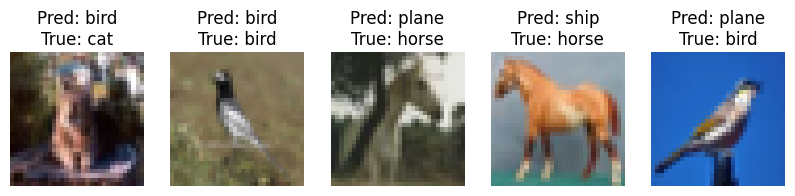

In [ ]:
random.seed(1)
num_samples = 5
indices = random.sample(range(X_test.shape[0]), num_samples)
X_check = X_test[indices]
y_check = y_test[indices]

y_pred = classifier.predict(X_check, k = 5)

X_check = np.reshape(X_check, (5, 32, 32, 3))
print(X_check.shape)

fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))  # 1행 5열로 이미지 배치
for i, ax in enumerate(axes):
    ax.imshow(X_check[i])  # 이미지 표시
    ax.axis('off')  # 축 숨기기
    ax.set_title(f"Pred: {classes[int(y_pred[i])]}\nTrue: {classes[y_check[i]]}")  # 예측값 & 정답 표시



이미지가 잘 분류 되었나요??

-여기에 적어주세요-

정확도가 20%도 안 되네요~

**<span style="color:brown"> [설문] </span>** 혹시 인공지능에 대해 얼마나 알고 계신가요?? 설명 가능한 단어를 모두 골라주세요  
<span style="color:violet"> 1. </span> 배치 정규화  ✔️ <br/>
<span style="color:violet"> 2. </span> 활성화 함수  
<span style="color:violet"> 3. </span> 과적합  ✔️ <br/>
<span style="color:violet"> 4. </span> 앙상블 학습 ✔️ <br/>
<span style="color:violet"> 5. </span> 드롭아웃  
<span style="color:violet"> 6. </span> 어텐션 매커니즘  

⬆️위에 적었습니다

## 1주차 과제 끝!
1주차 과제는 여기까지 입니다! 1주차 과제는 간단한 실습 위주로 준비해봤습니다.  

수업 중 이해가 안가거나 어려웠던 부분, 수업에 관한 피드백을 적어주시면 다음 주차 강의에 적극적으로 반영하겠습니다!

 인공지능 - AI

 머신러닝 - 패턴 학습 통해서 분류 / 회귀

 딥러닝 - Neural Network 사용해 더 인간같이 추론



---

지도학습 - x 데이터 y 레이블 식으로 학습하기

ex. 강아지 / 물고기 사진

비지도학습 - 정답 없이 그냥 하는 거

ex. 클러스터링

---
Nearest Neighbor 분류

L1 거리 abs(a-b)
L2 거리 (a^2+b^2)^.5

가장 가까운 거리의 값을 return

---

KNN

K-Nearest Neighbor

knn은 똑같은 학습 데이터와 데이터셋에서도 100% 정확도가 안 나올 수도..

근처에 있는 가장 자주 발견되는 데이터로 자신을 분류

K 몇으로 하는지가 좀 중요하다

성능 구림

---

선형 분류

이미지가 있으면 (ex. 32\*32\*3)
np.reshape(-1, 1) 이런식으로 다 풀어서 학습

색깔에 치중되어 있는 방법이라 이것도 약간 별로
